# Data Scientist Professional Practical Exam Submission

### Yahia Chammami 


## Data Validation

In [164]:
#importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score, precision_score, recall_score

In [165]:
#read recipe_site_traffic.csv file and convert it into dataframe
data = pd.read_csv('recipe_site_traffic_2212.csv')
#checking first 5 rows of the dataframe
data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [166]:
data.shape

(947, 8)

In [167]:
data.dtypes

recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings         object
high_traffic     object
dtype: object

In [168]:
# check for missing values
data.isnull().sum() 

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [169]:
# Check for duplicates
data.duplicated().sum()

0

In [170]:
#checking the unique values of 'category','servings', 'high_traffic'
for col in ['category','servings', 'high_traffic']:
    print('unique values of',col,data[col].unique())
    print('number of unique values of',col,data[col].nunique())
    print('--------')

unique values of category ['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']
number of unique values of category 11
--------
unique values of servings ['6' '4' '1' '2' '4 as a snack' '6 as a snack']
number of unique values of servings 6
--------
unique values of high_traffic ['High' nan]
number of unique values of high_traffic 1
--------


In [171]:
data = data.dropna(subset=['calories', 'carbohydrate', 'sugar', 'protein'])
data['high_traffic'] = data['high_traffic'].fillna(value='Low')

In [172]:
data['high_traffic'].value_counts()

High    535
Low     360
Name: high_traffic, dtype: int64

In [173]:
# Check the values that 'servings' column can take 
data['servings'].value_counts()

4               365
6               184
2               174
1               169
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

In [174]:
data.isnull().sum()

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

### Cleaning Numerical Variables

In [175]:
# Fix the 'servings' column
data['servings'].replace({'4 as a snack': 4, '6 as a snack': 6},inplace=True)
data['servings'] = data['servings'].astype('int64')
data.dtypes

recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings          int64
high_traffic     object
dtype: object

There are only 2 and 1 recipes of "4 as a snack" and "6 as a snack" servings, so I'll rename them to "4" and "6" for simplicity and convert to numerical.

In [176]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
recipe,895.0,473.652514,272.763283,2.00,237.500,475.00,708.500,947.00
calories,895.0,435.939196,453.020997,0.14,110.430,288.55,597.650,3633.16
carbohydrate,895.0,35.069676,43.949032,0.03,8.375,21.48,44.965,530.42
sugar,895.0,9.046547,14.679176,0.01,1.690,4.55,9.800,148.75
protein,895.0,24.149296,36.369739,0.00,3.195,10.80,30.200,363.36
servings,895.0,3.458101,1.735979,1.00,2.000,4.00,4.000,6.00


After careful examination, it was observed that the protein, calories, carbohydrate, and sugar columns, which are numeric variables representing nutritional values, do not contain any negative values. This indicates that all the recorded values for these variables are positive, as expected.

## Categorical features

In [177]:
# Verify the category distribution
data['category'].value_counts()

Breakfast         106
Chicken Breast     94
Beverages          92
Potato             83
Lunch/Snacks       82
Vegetable          78
Dessert            77
Meat               74
Pork               73
Chicken            69
One Dish Meal      67
Name: category, dtype: int64

An additional category called Chicken Breast was discovered, which caused inconsistency in the category column. To resolve this inconsistency and maintain uniformity in the dataset, the decision was made to replace the Chicken Breast category with Chicken

In [178]:
# Replacing 'Chicken Breast' instances with 'Chicken'
data['category'] = data['category'].replace('Chicken Breast', 'Chicken')

# Verify the updated category distribution
data['category'].value_counts()

Chicken          163
Breakfast        106
Beverages         92
Potato            83
Lunch/Snacks      82
Vegetable         78
Dessert           77
Meat              74
Pork              73
One Dish Meal     67
Name: category, dtype: int64

In [179]:
data.shape

(895, 8)

The dataset contains **947 rows** and **8 columns**. I have validated all the columns against the criteria in the dataset table:

- recipe: Same as description without missing values. all unique
- calories: Same as description Missing 52 values filled with categorical mean
- carbohydrate: Same as description Missing 52 values  filled with categorical mean
- sugar: Same as description Missing 52 values  filled with categorical mean
- protein: Same as description Missing 52 values  filled with categorical mean
- category:  Same as description. No missing values. 11 different values. Breakfast, Chicken Breast, Beverages, Lunch/Snack, Potato, Pork, Vegetable,Dessert, Meat, Chicken, One Dish Meal 
- servings: Had to switch from object to int.. Replaced ‘4 as a snack’ and ‘6 as a snack’ to  4 and 6
- high_traffic :  Same as description. Converted to 1 for High and 0 for nulls.
After cleaning and validating the data, the dataset now consists of **895 recipes**

In [180]:
## Exploratory Data Analysis
numeric_vars = ['calories', 'carbohydrate', 'sugar', 'protein']

# Create a 2x2 grid of subplots with larger subplots
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=[f'Distribution of {var}' for var in numeric_vars])

# Plotting the numeric variables and add legends
for i, var in enumerate(numeric_vars):
    row = i // 2 + 1
    col = i % 2 + 1
    hist = go.Histogram(x=data[var], nbinsx=30, name=var)
    fig.add_trace(hist, row=row, col=col)

# Update the layout with larger subplot sizes
fig.update_layout(
    title="Distribution of Numeric Variables",
    height=600,  # Adjust the height of the entire plot
    width=1000,   # Adjust the width of the entire plot
    showlegend=True  # Show legends
)

# Show the plot
fig.show()

The histplots illustrate a right-skewed distribution in which the majority of recipes have lower nutritional values, especially in terms of calories, indicating a healthier overall trend. However, there are a few recipes with significantly higher nutritional values, suggesting the presence of indulgent or calorie-dense dishes as outliers in the dataset.

In [181]:
# Create subplots for each variable
fig = sp.make_subplots(1, len(numeric_vars), subplot_titles=numeric_vars)

# Iterate through the variables and create individual boxplots in separate subplots
for i, var in enumerate(numeric_vars):
    boxplot = go.Box(y=data[var], name=var, boxmean=True)
    fig.add_trace(boxplot, row=1, col=i + 1)

# Update the layout
fig.update_layout(
    title="Boxplots of Numeric Variables",
    xaxis=dict(title="Variable"),
    yaxis=dict(title="Value"),
    showlegend=False,  # Hide the legend for individual subplots
    height=400,        # Adjust the height of the entire plot
    width=1100         # Adjust the width of the entire plot
)

# Show the plot
fig.show()


**Since we need to predict the high_traffic, the high_traffic variable would be our Target variable.**

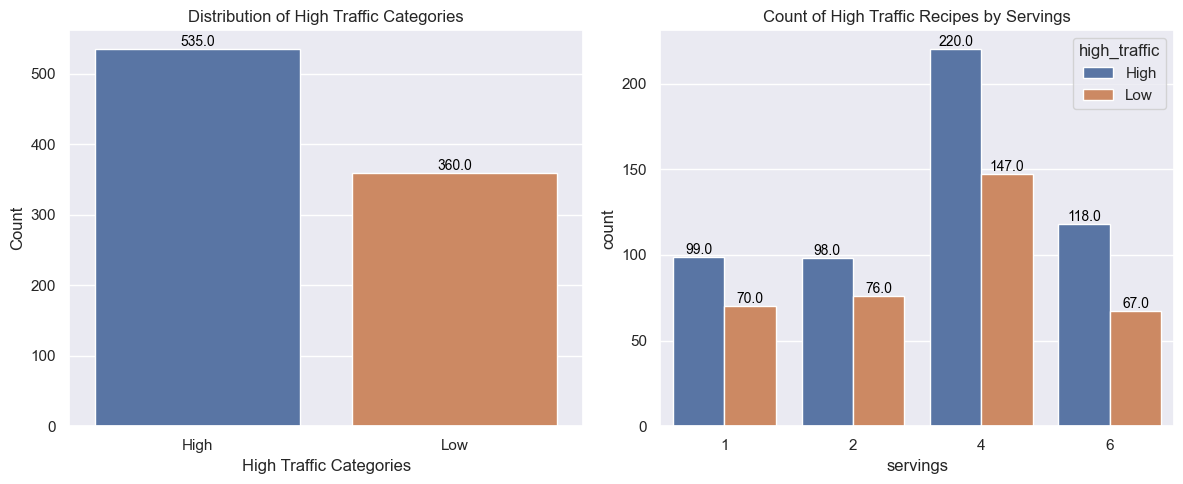

In [182]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First Countplot
sns.countplot(x='high_traffic', data=data, order=data['high_traffic'].value_counts().index, ax=axes[0])
axes[0].set_xlabel('High Traffic Categories')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of High Traffic Categories')

# Adding count labels on top of the bars for the first countplot
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Second Countplot
sns.countplot(data=data, x="servings", hue="high_traffic", ax=axes[1])
axes[1].set_title("Count of High Traffic Recipes by Servings")

# Adding count labels on top of the bars for the second countplot
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Adjust spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

**for each serving, the amount of recipes with high traffic are more than the amount of recipes with low traffic, so this feature doesn't have a big influence on target variable.**

In [183]:
import plotly.express as px

# Assuming your data is already loaded and available in a DataFrame called 'data'

fig = px.bar(data, y="category", color="high_traffic", title="Count of High Traffic Recipes by Category")
fig.update_layout(xaxis_title="Count", yaxis_title="Category")
fig.show()


## Prepare Data for Modelling

To enable modelling, I chose **calories, carbohydrate, sugar, protein, servings, category** as features, **high_traffic** as target variables. I also have made the following changes:

- Convert the categorical variable **category** into numeric feature
- Normalize the numeric features
- Split the data into a training set and a test set

Since the ranges of the numeric values vary greatly, it is necessary to scale them to avoid any influence on the models. In addition, since all of the numeric features are right-skewed, using power transformation is a suitable approach to address this skewness issue.

In [184]:
# One Hot Encoding categorical features
df_encoded = pd.get_dummies(data, columns=['category'])
df_encoded['high_traffic'] = df_encoded['high_traffic'].map({'High': 1, 'Low': 0})

In [185]:
# Apply StandardScaler and PowerTransformer to specified columns
columns_to_scale = ['calories', 'carbohydrate', 'sugar', 'protein']

scaler = StandardScaler()
powerTR =  PowerTransformer()

df_encoded[columns_to_scale] = powerTR.fit_transform(df_encoded[columns_to_scale])
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])
df_encoded = df_encoded.drop('recipe', axis=1)


## Model Development
As we are trying to predict which recipes will be popular, this is a classification problem with two possible outcomes (binary). **Logistic regression** will be used as the baseline model, while the **random forest classifier** will be used as the comparative model

Predicting whether a recipe will have high traffic or not is a classification problem in machine learning.
I have chosen the **Logistic Regression model** as my baseline model because it is a suitable option for predicting binary output variables, such as whether a recipe will be high traffic or not. As for the comparison model, I have opted for the **Random forest Classifier**. This model combines multiple decision trees to make predictions. It works by iteratively improving the model by focusing on the samples that were previously misclassified.

In [186]:
X = df_encoded.drop('high_traffic', axis=1)
y = df_encoded['high_traffic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print('shape of Training set', X_train.shape)
print('shape of Testing set', X_test.shape)

shape of Training set (805, 15)
shape of Testing set (90, 15)


## Baseline Model - Logistic Regression Model
A logistic regression is conducted with the hyparparameters 'liblinear' as the solver, 'l1' as the penalty, and 'C'=10. Optimum 'C' value is obtained through randomizedseachcv.

In [187]:
# Logistic Regression
param_grid = {'C': [10, 100, 200, 1000]}
LR = LogisticRegression(solver='liblinear', penalty = 'l1', random_state = 123)
LR = RandomizedSearchCV(estimator = LR, param_distributions = param_grid)
#fitting the model
LR.fit(X_train, y_train)

print(LR.best_estimator_)
print(LR.best_estimator_.coef_, LR.best_estimator_.intercept_)
LR_best_pred = LR.best_estimator_.predict(X_test)
LR_best_pred_probs =LR.best_estimator_.predict_proba(X_test)[:,1]

LogisticRegression(C=10, penalty='l1', random_state=123, solver='liblinear')
[[-0.04649042 -0.02647285 -0.02487715  0.07278033  0.01970363 -3.58818481
  -1.49910959 -0.89937142 -0.07461721  0.          0.39336433  0.46806069
   1.44123978  1.93927538  5.80431821]] [0.60889654]


In [188]:
#checking for overfitting
print ('Logistic Regression Training score',round(LR.score(X_train, y_train),5))
print ('Logistic Regression Testing score',round(LR.score(X_test, y_test),5))

Logistic Regression Training score 0.75901
Logistic Regression Testing score 0.78889


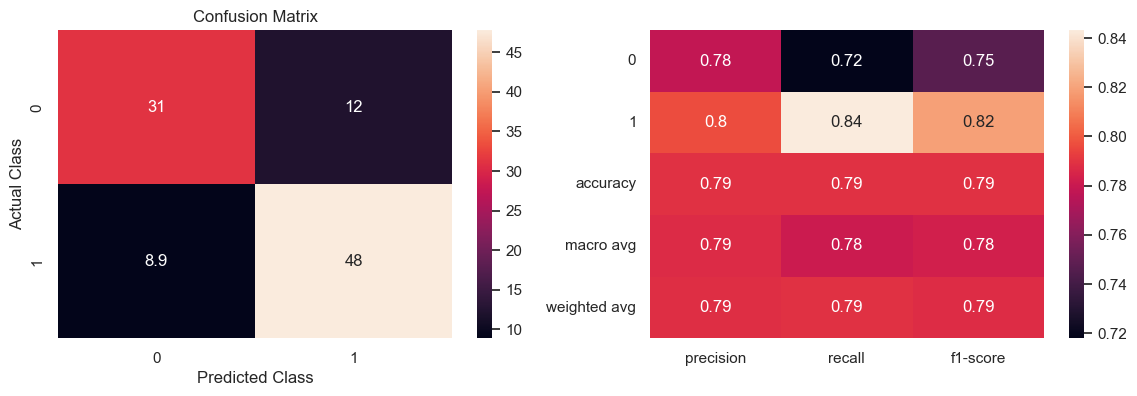

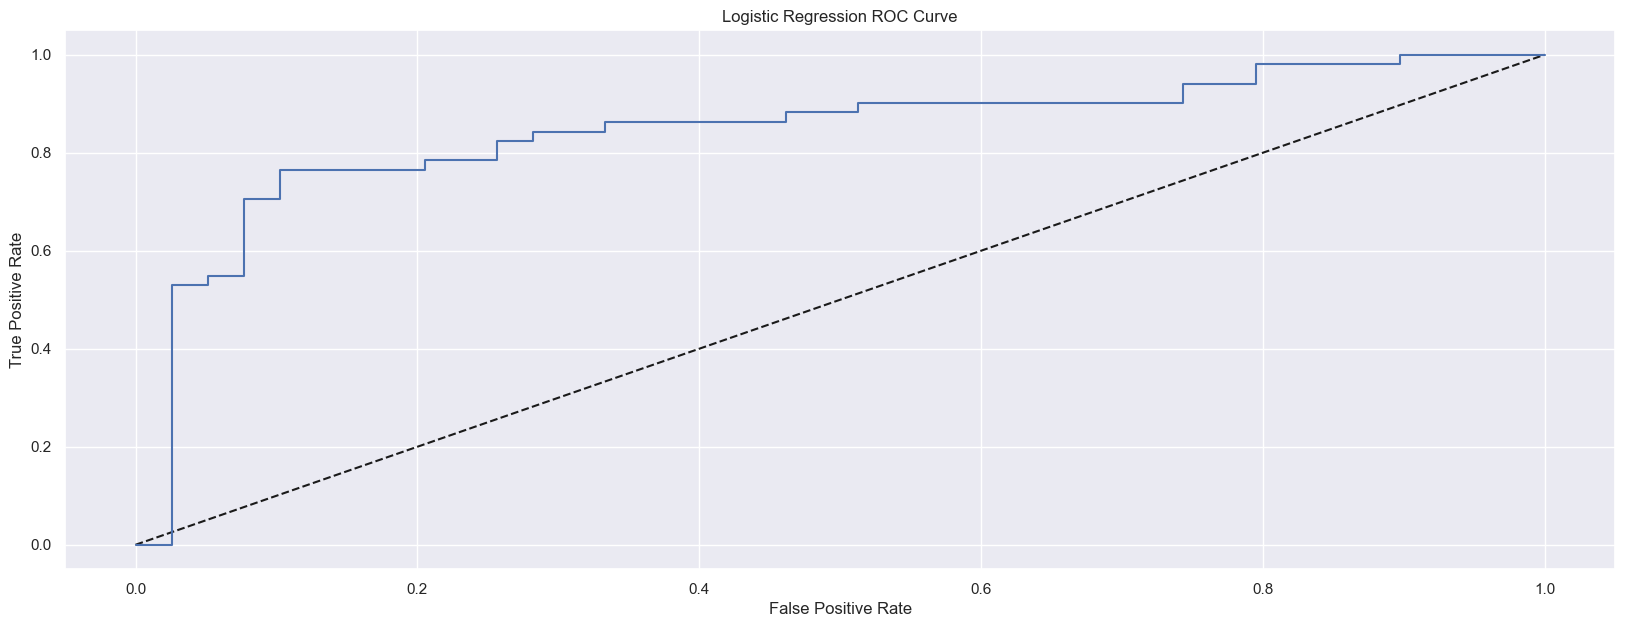

In [189]:
con_mat = confusion_matrix(y_test,LR_best_pred)
plt.figure(figsize=(14,4)) 
plt.subplot(1,2,1)
sns.heatmap(con_mat/np.sum(con_mat)*100,annot =True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

plt.subplot(1,2,2)
sns.heatmap(pd.DataFrame(classification_report(y_test,LR_best_pred,output_dict=True)).T.iloc[:,:-1], annot = True)
plt.show()

# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, LR_best_pred_probs)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()


## Comparision Model -  Gradient Boosting Classifier


In [190]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
print ('GBC Training score',round(gbc.score(X_train, y_train),5)) 
print ('GBC Testing score',round(gbc.score(X_test, y_test),5)) 

GBC Training score 0.8559
GBC Testing score 0.76667


In [191]:
# Hyper paramenters tuning
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]}
cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(X_train, y_train)
print(cv.best_estimator_)
best=cv.best_estimator_
best.fit(X_train, y_train)
print ('GBC Training score',round(best.score(X_train, y_train),5)) 
print ('GBC Testing score',round(best.score(X_test, y_test),5)) 

GradientBoostingClassifier(learning_rate=1, max_depth=1, n_estimators=5)
GBC Training score 0.75901
GBC Testing score 0.78889


In [192]:
# Finding the best random state split for the best model of GBC
scores={}
for x in range (1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=x)
    gbc = GradientBoostingClassifier(n_estimators=250, learning_rate=0.05,max_depth=1, random_state=x).fit(X_train, y_train);
    scores[x]=round(gbc.score(X_test, y_test),5)

best_random_state=max(scores, key=scores.get)
print('Best testing score is :',max(scores.values()))
print('Best testing score happens at random state : ',best_random_state) 


Best testing score is : 0.83036
Best testing score happens at random state :  100


In [193]:
# Training the best model at the best random state
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=best_random_state)
clf = GradientBoostingClassifier(n_estimators=250, learning_rate=0.05,max_depth=1,
                                 random_state=best_random_state).fit(X_train, y_train)
print ('GBC Testing score',round(clf.score(X_test, y_test),5)*100,'%') 

GBC Testing score 83.036 %


In [194]:
#using accuracy and recall with Gradient boost classifier

y_pred=clf.predict(X_test)
print ('Business accuracy is: ',round(data.high_traffic.value_counts(normalize=True)[0],4))
print ('GBC Aaccuarcy is: ',round(accuracy_score(y_pred, y_test),4))

Business accuracy is:  0.5978
GBC Aaccuarcy is:  0.8304


#### this shows that:
    - The model accuracy shows that it can correctly classify more than 83% of the data in the test set.
    - The model precision suggests that the cases the model classified as positive, more than 80% are true positive.
    - The model recall demonstrates that the model is able to correctly predict more than 80% of the true positive cases

##### the business accuracy is only 59.8%


## Business Metric
For a business metric I suggest  motoring the click-through rate (CTR) of the recipes displayed on the homepage.e. The CTR is the ratio of clicks to impressions, and in this context, it would be the percentage of website visitors who click on the recipe displayed on the homepage out of the total number of visitors who see the recipe. This will indicate how engaging and relevant the recipe is to the website visitor.
​
We can estimate the initial value for the CTR metric as follows:
​
Total number of impressions: Since we don't have information on the number of impressions, we can assume that the number of high traffic recipes is proportional to the number of impressions. 
​
**Total number of impressions** = (Total number of recipes / Number of high traffic recipes) x Number of high traffic recipes
​
**Total number of impressions** = (947 / 574) x 574
​
**Total number of impressions** = 947
​
Therefore, the total number of impressions is estimated to be 947.
​
Estimated CTR:
​
**CTR** = (Number of high traffic recipes / Total number of recipes) x 100
​
**CTR** = (574 / 947) x 100
​
**CTR** = 60.6%
​
Therefore, the estimated initial value for the CTR metric is 60.6%.
​
We can use this estimated initial value  to monitor the performance of future recipes on the homepage. If the CTR of a recipe is higher than the estimated initial value, it indicates that the recipe is more engaging and relevant to the website visitor, and vice versa.
## Recommendations
My recommendations are 
- The data should be  proofed to in order to catch any errors in the measurements. 
- Start tracking  the click-through rate for recipes on the same page. This should be recorded for future analysis.
- We could also consider incorporating user feedback and engagement metrics (such as comments, likes, and shares) to continuously improve the recipe selection and display process.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation